## Import Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Reading Data

In [75]:
df = pd.read_csv('data/raw.csv')

In [76]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [78]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [79]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

As there are no missing values present in the dataset, no need to handle missing values.

Identifying outiers in the data.

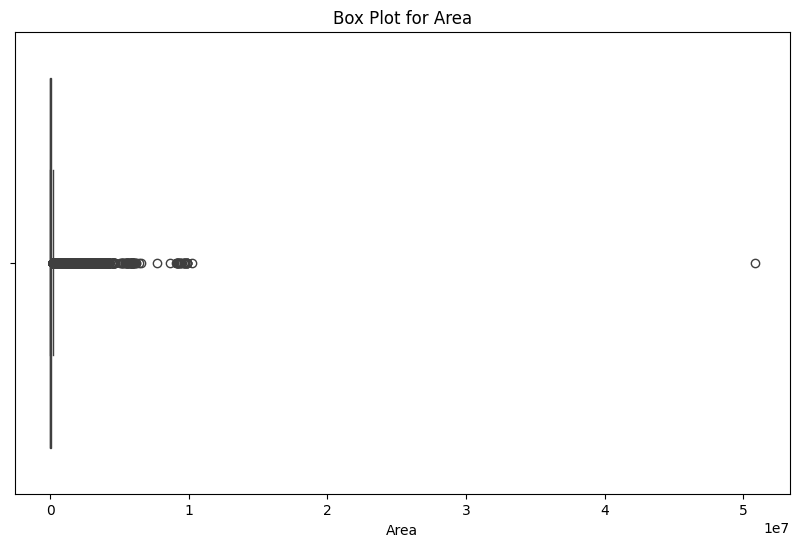

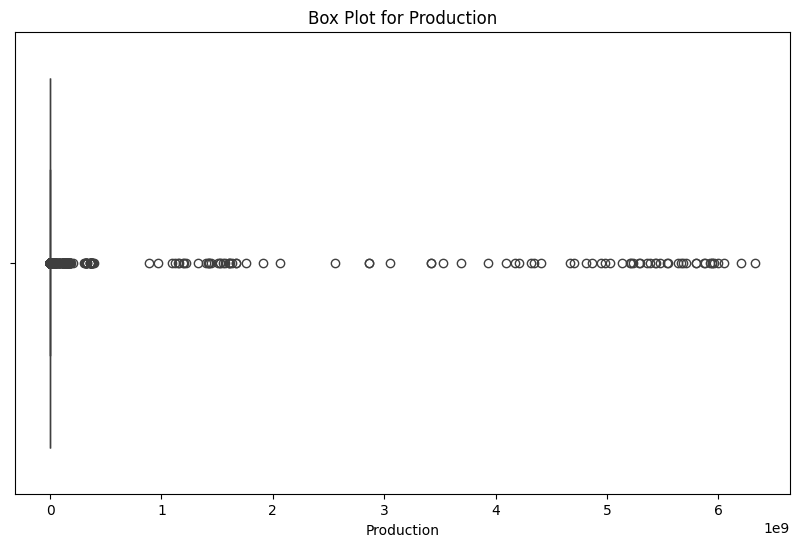

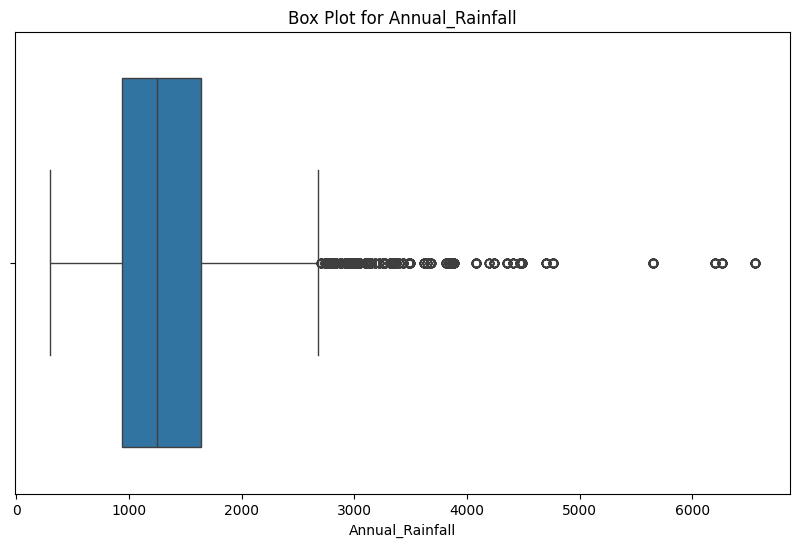

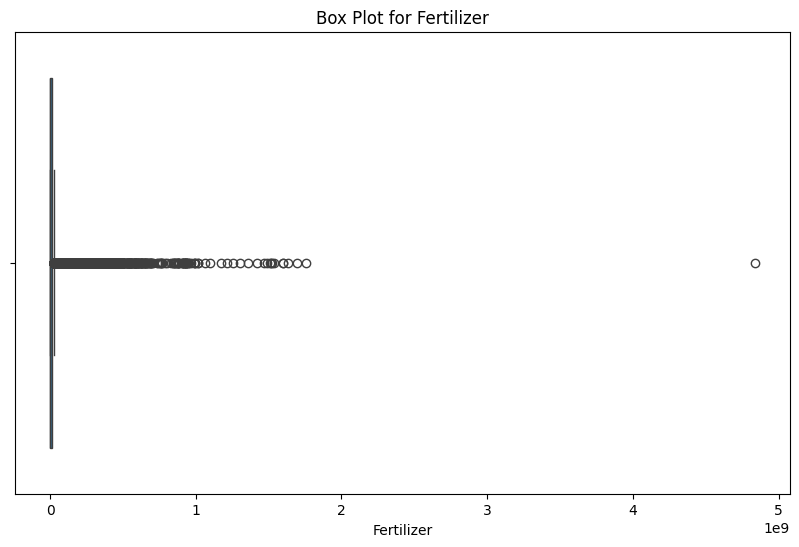

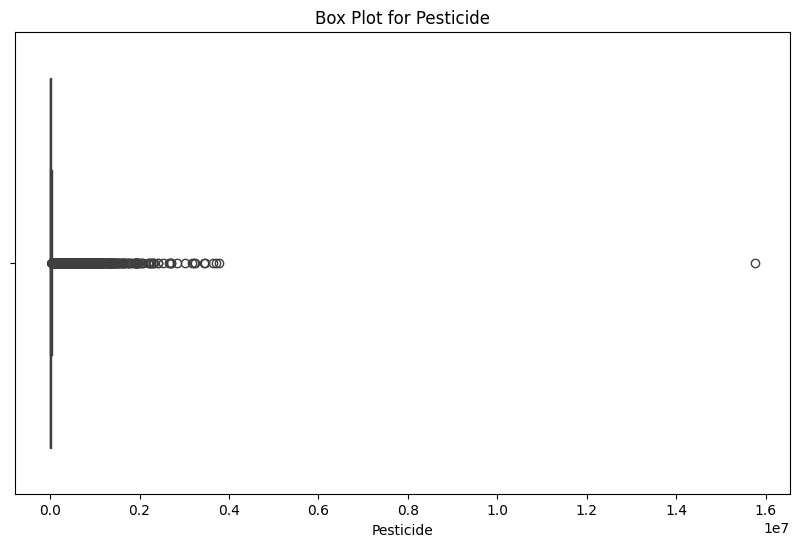

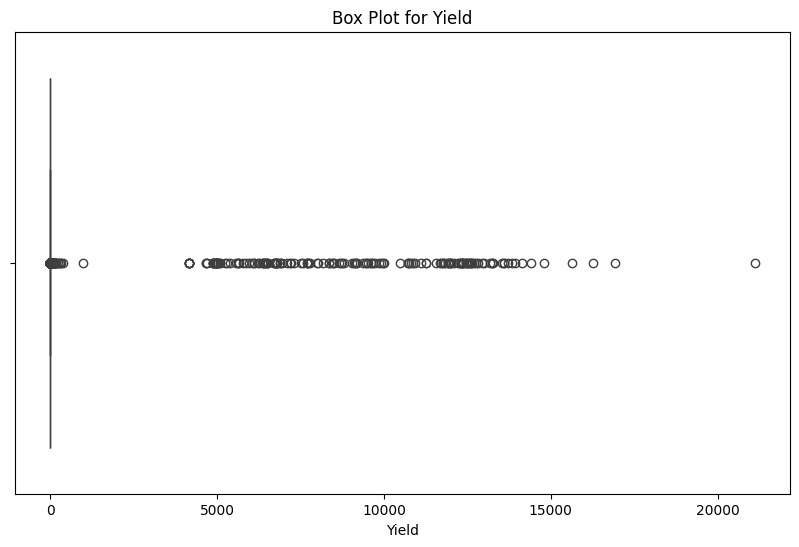

In [80]:
# Choose the numerical columns for outlier detection and removal
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

Removing outliers in the data.

In [81]:
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Remove outliers
    data_cleaned = data[~outliers]

    return data_cleaned

# Choose the numerical columns for outlier detection and removal
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Remove outliers for each numerical column
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

# Display the new summary statistics after removing outliers
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,8779.000000,8779.000000,8779.000000,8779.000000,8.779000e+03,8779.000000,8779.000000
mean,2009.278278,4389.781170,4319.050803,1368.938709,5.877418e+05,1108.728456,0.967723
std,6.309056,5536.829944,7585.475856,547.950813,7.504944e+05,1318.859106,0.708711
min,1997.000000,0.500000,0.000000,301.300000,5.417000e+01,0.090000,0.000000
25%,2004.000000,384.500000,266.000000,992.500000,5.297137e+04,99.000000,0.500000
50%,2010.000000,2046.000000,1474.000000,1317.200000,2.842577e+05,531.630000,0.777500
75%,2015.000000,6592.000000,4938.000000,1648.200000,8.737258e+05,1702.085000,1.199722
max,2020.000000,34347.000000,97900.000000,2880.200000,4.912995e+06,5315.060000,3.823333


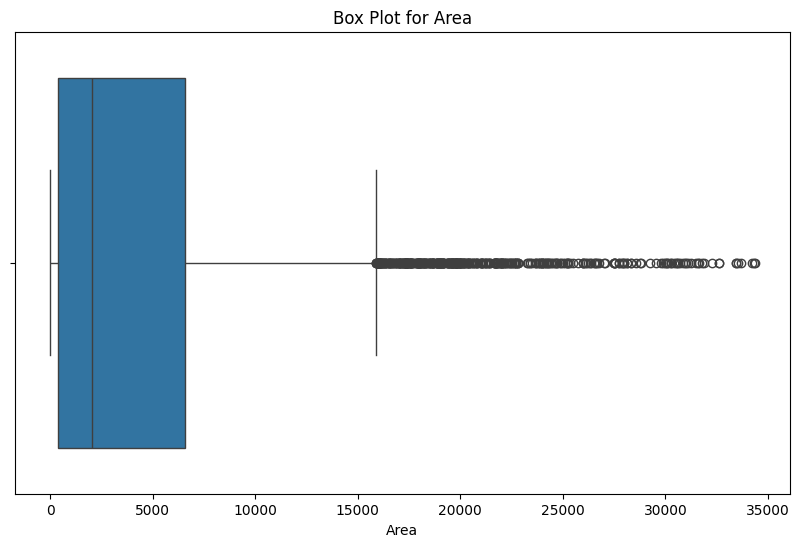

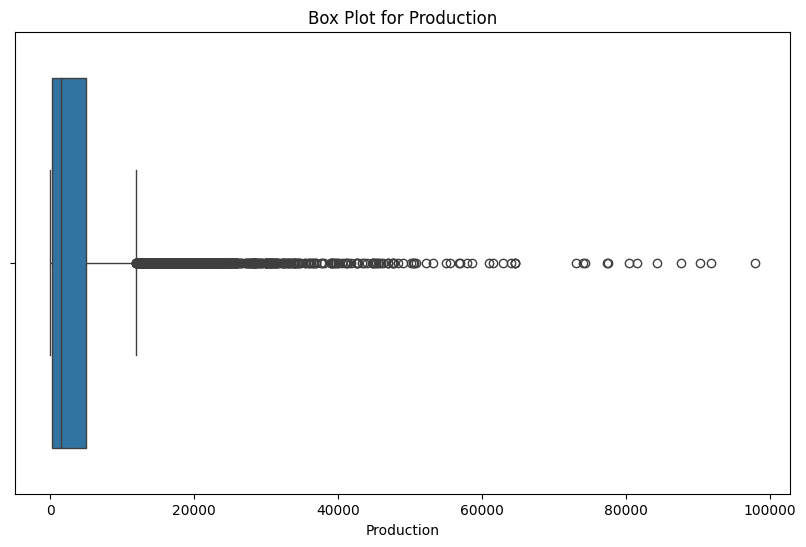

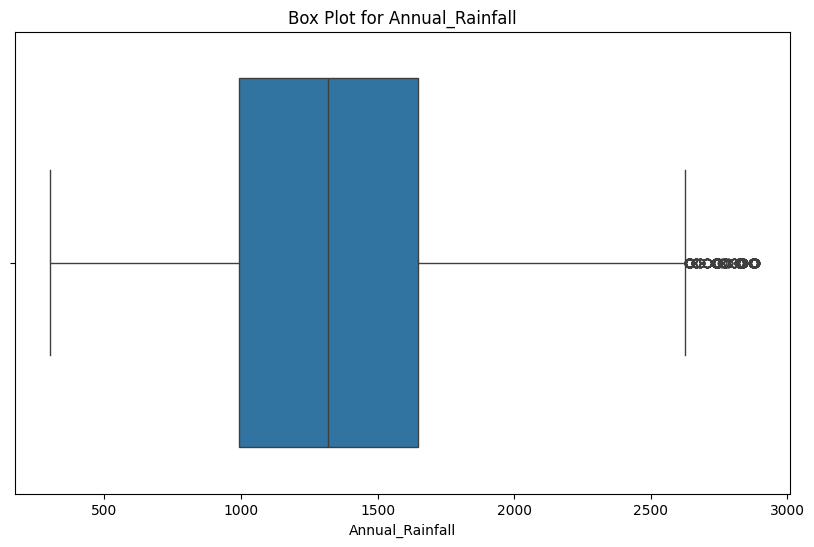

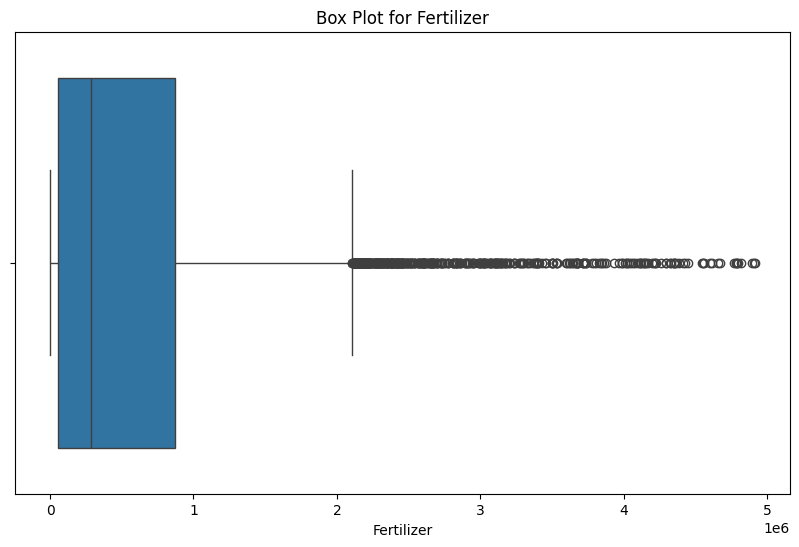

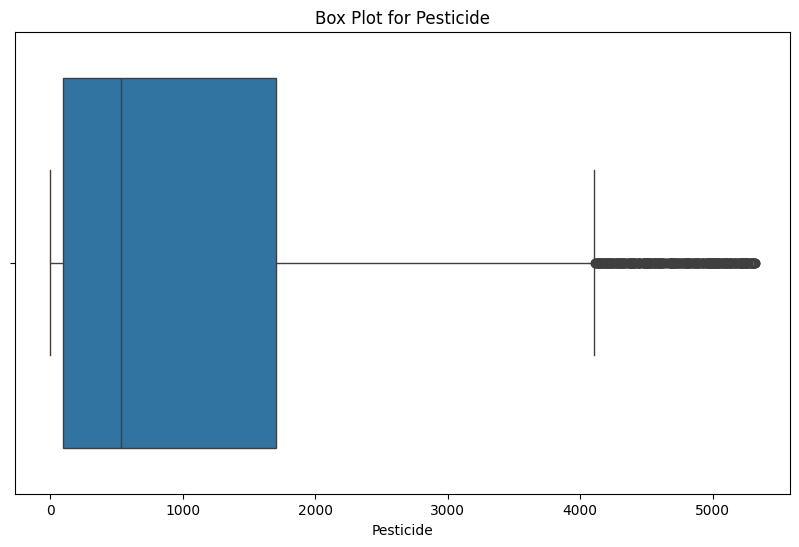

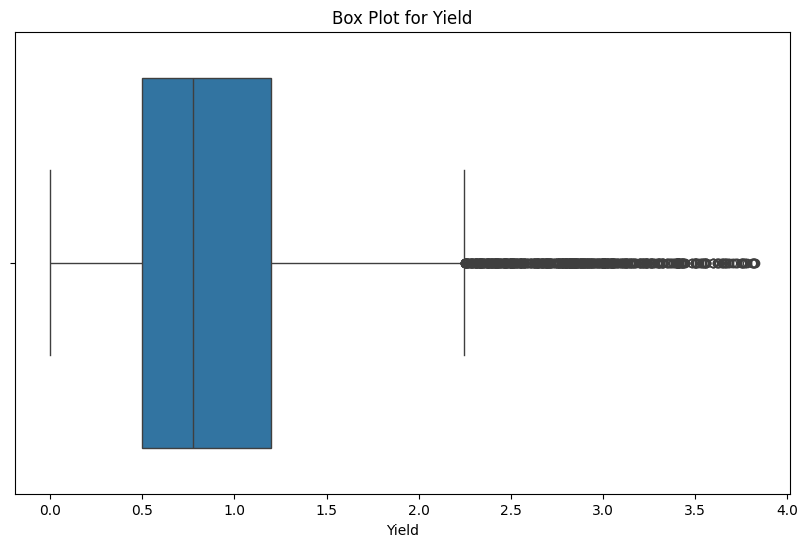

In [82]:
# Choose the numerical columns for outlier detection and removal
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [83]:
numeric_features = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

### Correlation Matrix

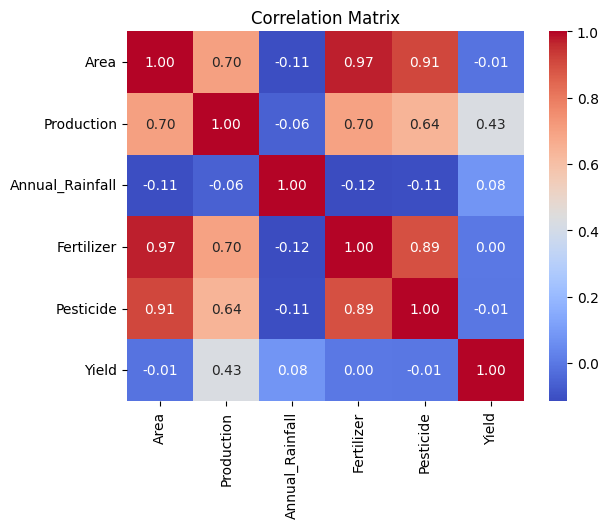

In [84]:
# Visualize the correlation matrix
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Explore categorical features

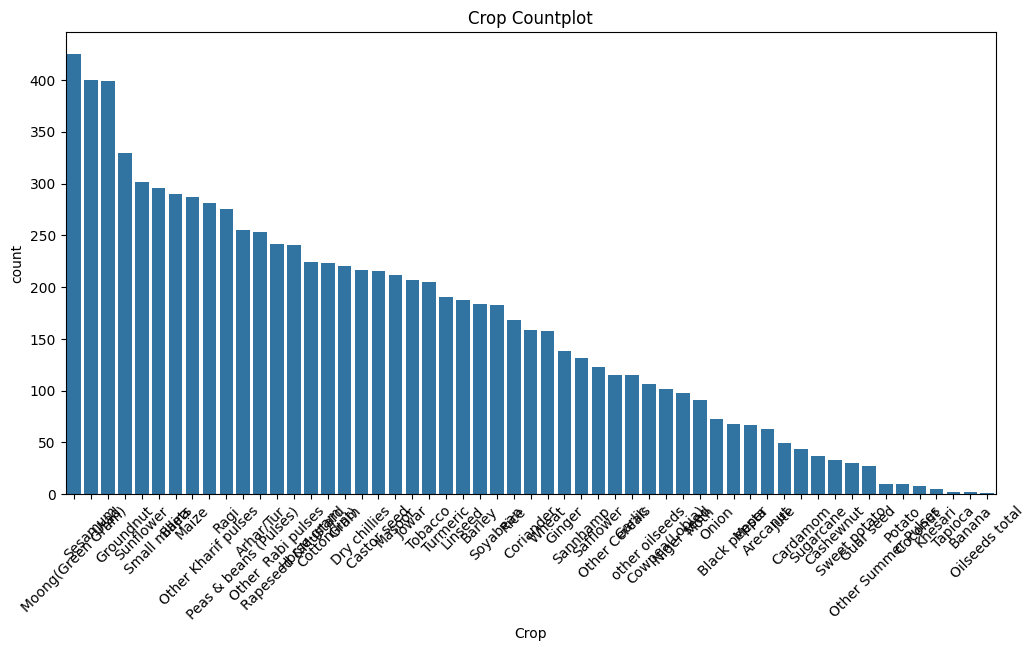

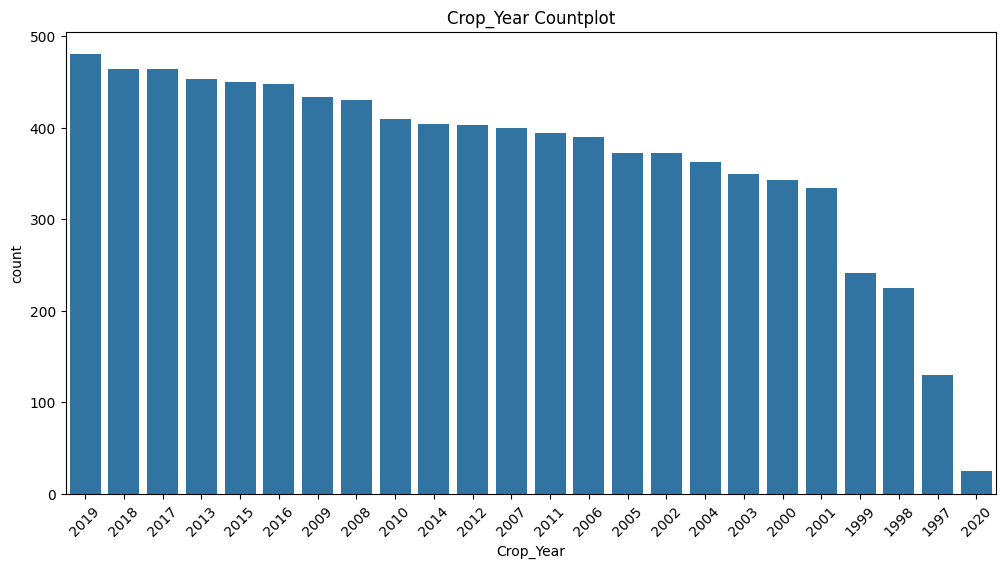

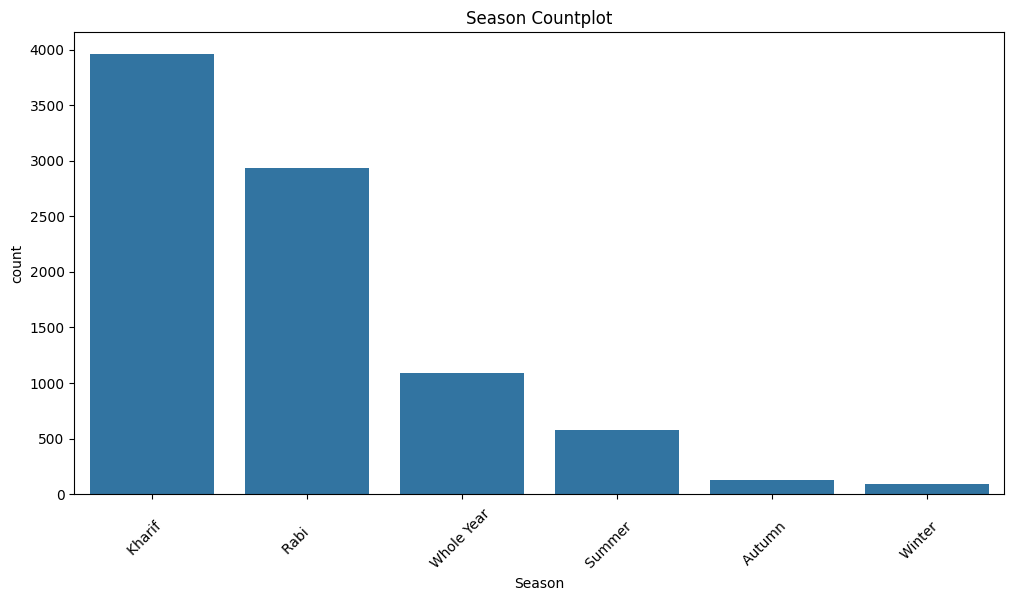

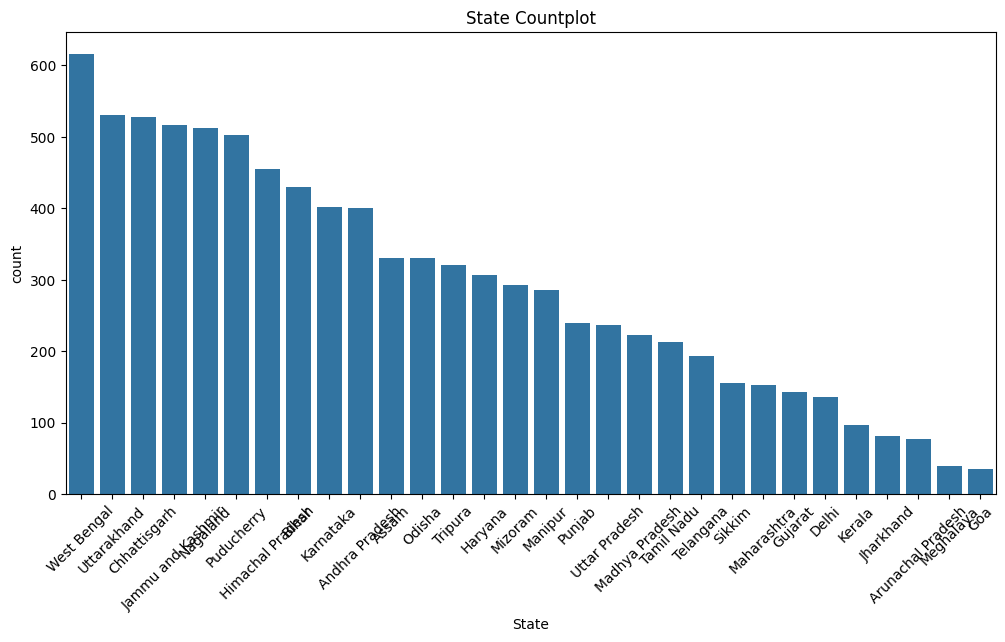

In [85]:
categorical_features = ['Crop', 'Crop_Year', 'Season', 'State']

# Countplot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f"{feature} Countplot")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_24368\2029333301.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\prasa\AppData\Local\Temp\ipykernel_24368\2029333301.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




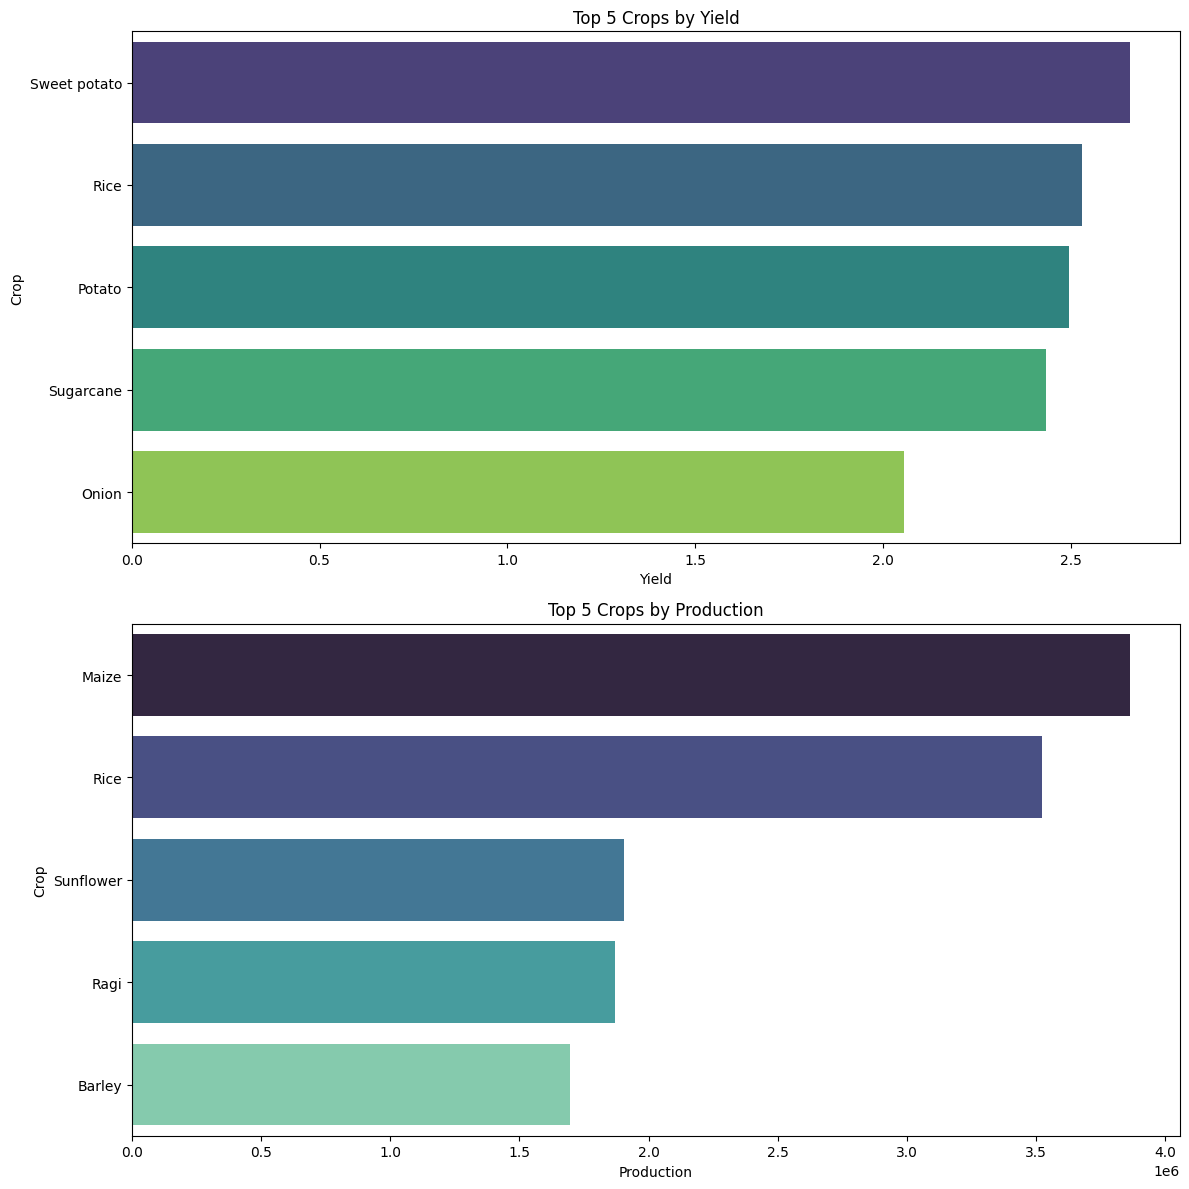

In [86]:
# Visualize each season with the highest crop yield
fig = px.bar(df.groupby('Season')['Yield'].max().reset_index(), 
             x='Season', y='Yield', color='Season', 
             title='Highest Crop Yield in Each Season')
fig.show()

# Visualize the top 5 crops by yield and production
top_crops_yield = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(5)
top_crops_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Top 5 crops by yield
sns.barplot(x=top_crops_yield.values, y=top_crops_yield.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Crops by Yield')
axes[0].set_xlabel('Yield')
axes[0].set_ylabel('Crop')

# Top 5 crops by production
sns.barplot(x=top_crops_production.values, y=top_crops_production.index, ax=axes[1], palette='mako')
axes[1].set_title('Top 5 Crops by Production')
axes[1].set_xlabel('Production')
axes[1].set_ylabel('Crop')

plt.tight_layout()
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_24368\3913898326.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\prasa\AppData\Local\Temp\ipykernel_24368\3913898326.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




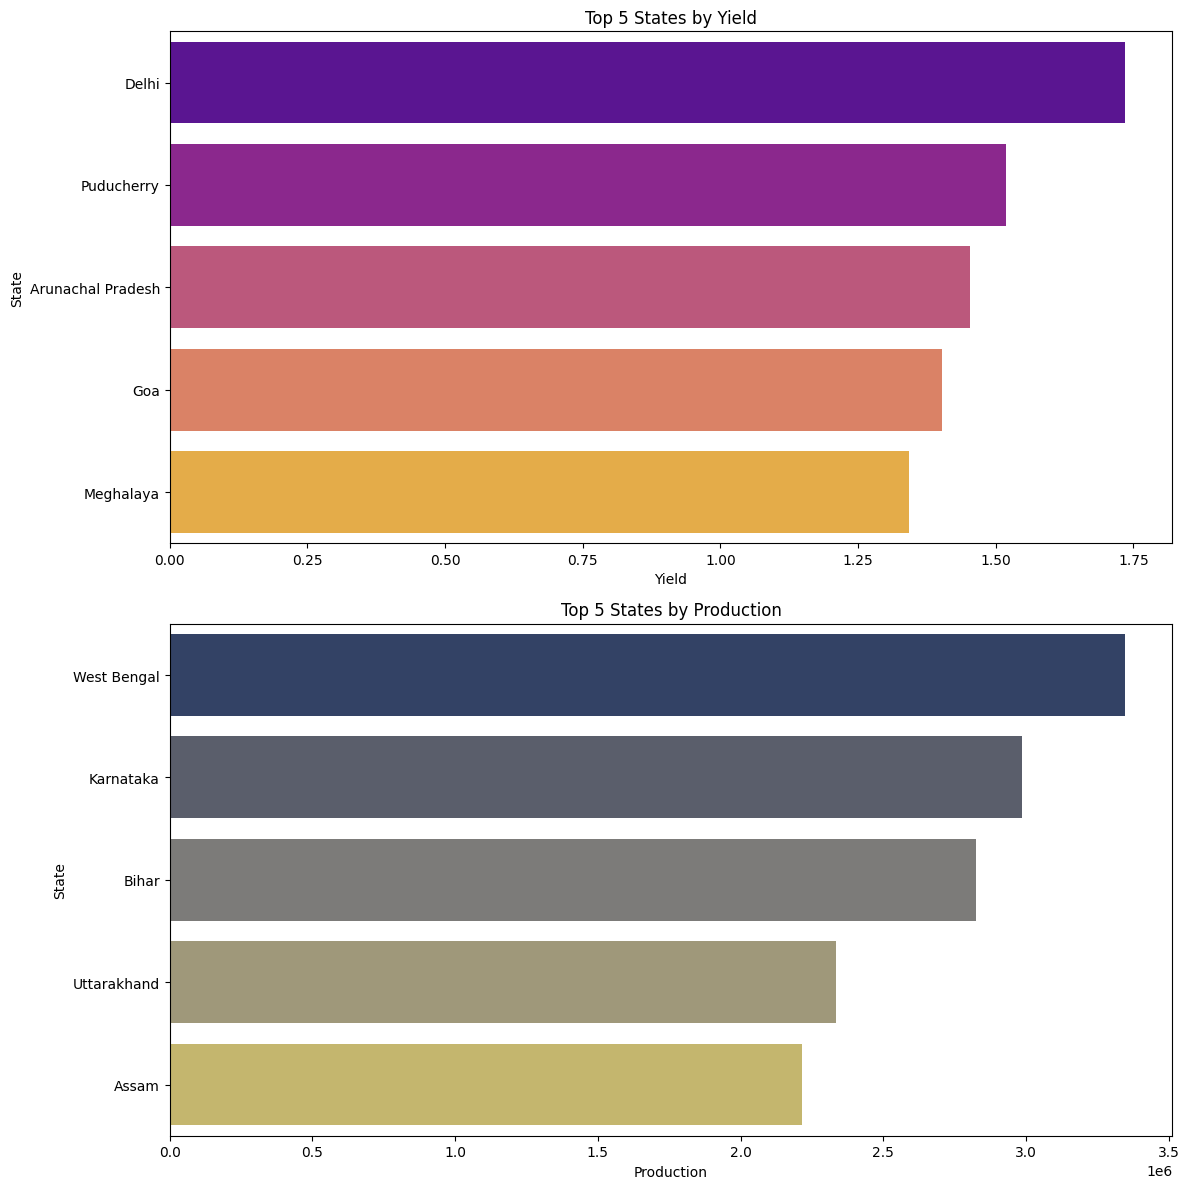

In [87]:
# Visualize the top 5 states by yield and production
top_states_yield = df.groupby('State')['Yield'].mean().sort_values(ascending=False).head(5)
top_states_production = df.groupby('State')['Production'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Top 5 states by yield
sns.barplot(x=top_states_yield.values, y=top_states_yield.index, ax=axes[0], palette='plasma')
axes[0].set_title('Top 5 States by Yield')
axes[0].set_xlabel('Yield')
axes[0].set_ylabel('State')

# Top 5 states by production
sns.barplot(x=top_states_production.values, y=top_states_production.index, ax=axes[1], palette='cividis')
axes[1].set_title('Top 5 States by Production')
axes[1].set_xlabel('Production')
axes[1].set_ylabel('State')

plt.tight_layout()
plt.show()

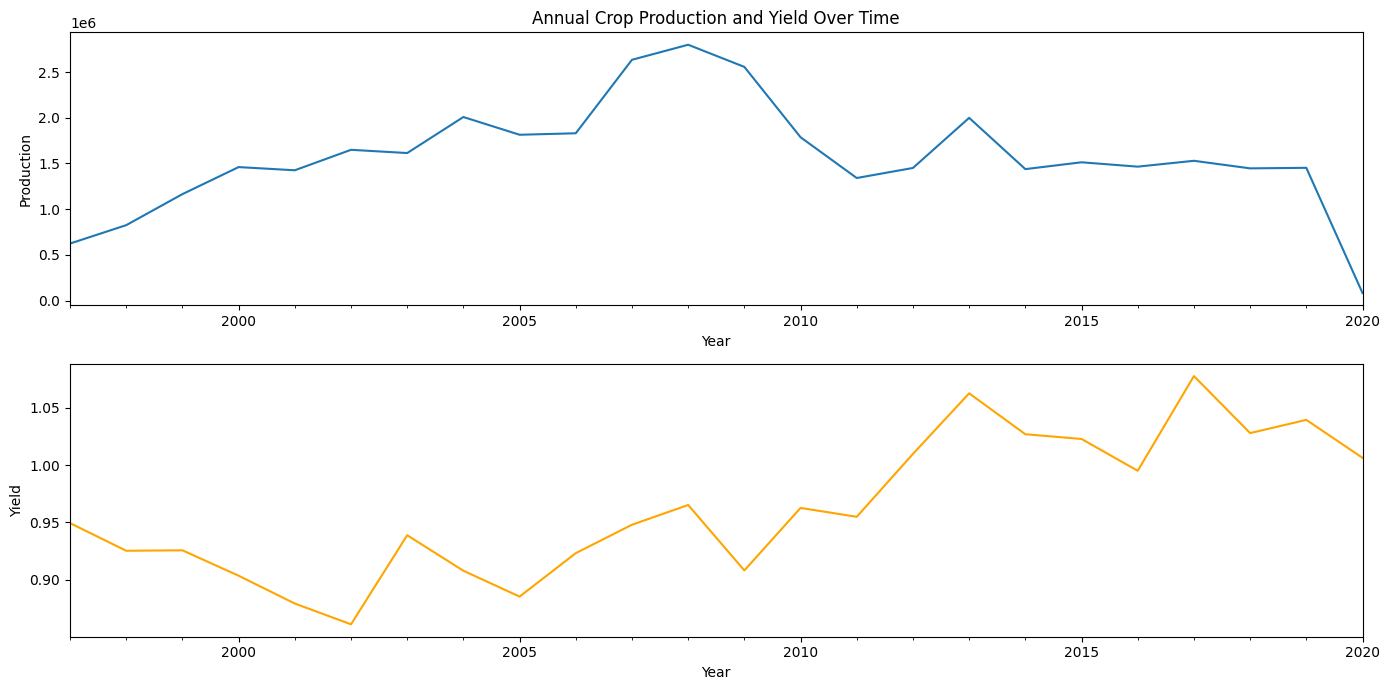

In [89]:
df.set_index('Crop_Year', inplace=True)

plt.figure(figsize=(14, 7))

# Plot annual crop production
plt.subplot(2, 1, 1)
df['Production'].resample('Y').sum().plot(title='Annual Crop Production and Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Production')

# Plot annual crop yield
plt.subplot(2, 1, 2)
df['Yield'].resample('Y').mean().plot(color='orange')
plt.xlabel('Year')
plt.ylabel('Yield')

plt.tight_layout()
plt.show()

* Annual Crop Production Over Time
    - The plot shows how the total crop production changes from year to year.
    - Peaks or valleys in the plot indicate years with higher or lower total crop production.


* Annual Crop Yield Over Time
    - The plot illustrates the average yield of crops per unit area over time.
    - Changes in the yield plot may suggest variations in the efficiency or success of crop cultivation practices.


* Combined Interpretation:
    - By combining both plots, you can observe whether changes in total crop production are influenced by variations in crop yield or vice versa.
    Comparing the two trends may help identify patterns or correlations between the total quantity of crops produced and the average yield per unit area.

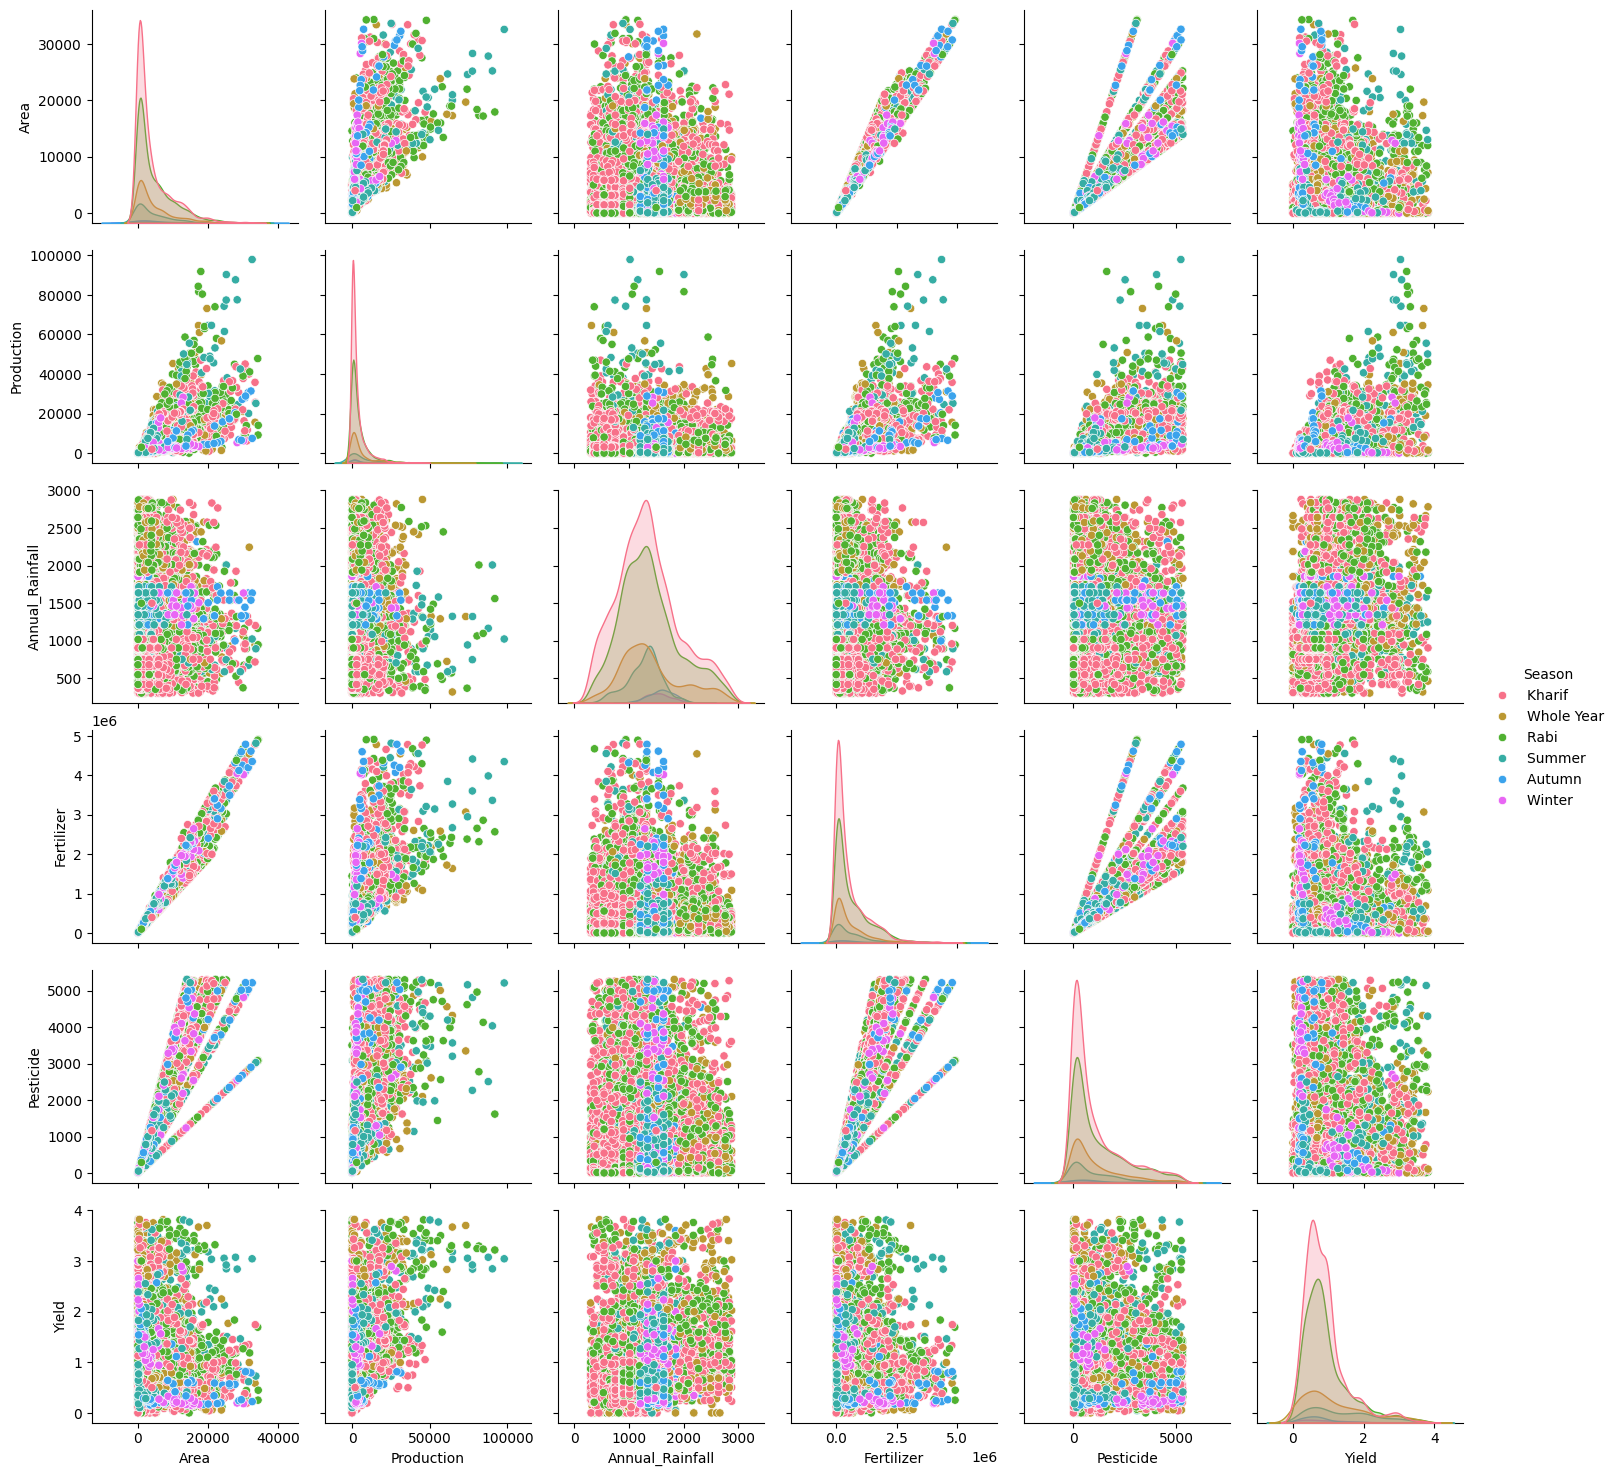

In [ ]:
sns.pairplot(df, hue='Season', diag_kind='kde', palette='husl')
plt.show()

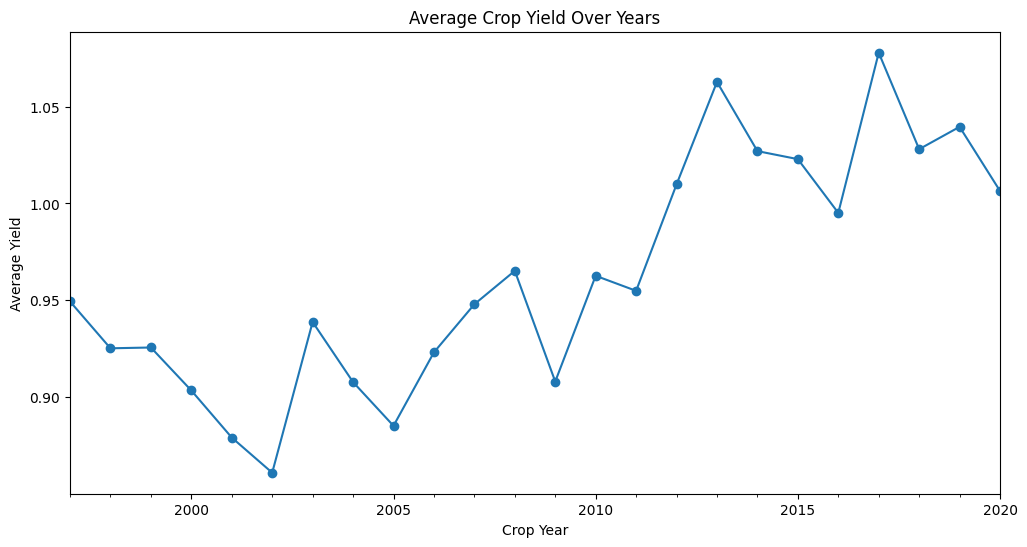

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('Crop_Year')['Yield'].mean().plot(marker='o')
plt.title('Average Crop Yield Over Years')
plt.xlabel('Crop Year')
plt.ylabel('Average Yield')
plt.show()

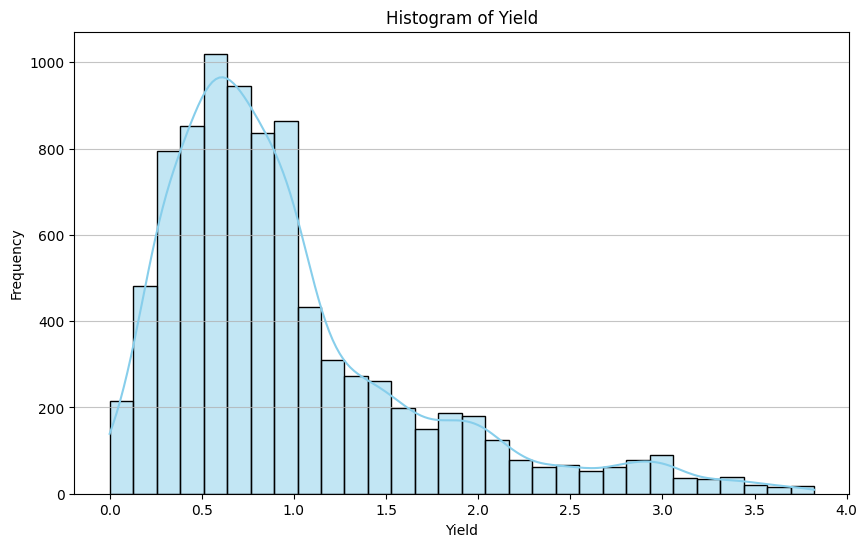

In [ ]:
feature_to_plot = 'Yield'

plt.figure(figsize=(10, 6))
sns.histplot(df[feature_to_plot], bins=30, kde=True, color='skyblue')
plt.title(f'Histogram of {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In the context of crop yield, a right-skewed distribution suggests that a significant portion of the crops in our dataset may have relatively lower yields, while there are fewer instances of exceptionally high-yielding crops.